# PROJET DATA – DU PYTHON


### Plan du Projet DATA :

_____________________________________________________________

1. Traitement de données : compréhension des données, analyse de la 
complétude et de la conformité des données, contrôles de cohérence
(univarié/multivarié), gestion des anomalies : mise en place de correctif, 
exclusions, etc.
2. Jointures éventuelles de bases et contrôles 
3. Analyses descriptives des données : univariée, multivariée, ASD
4. Analyse graphique (data visualisation) + Interfaçage via Shiny for Python 
5. Modélisation : supervisée (régression, classification) vs non supervisée ; 
paramétrique (économétriques) vs non paramétriques (machine learning)
6. Analyse des résultats : interprétation, explications 
7. Application : prévision, tarification, etc.



- Understanding the Problem Statement
- 2. Import Data and Required Packages
    2.1 Import Packages
    2.2 Import Data
    2.3 Show top 5
- 3. Data Preprocessing 
    - 3.1 DB_SIN
        * 3.1.a Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values, Anomalies fix)
        * 3.1.b Preprocessing and Exploratory Analysis
        * 3.1.c Visualization
    - 3.2 DB_CNT
        * 3.2.a Data Check and cleaning (Missing Values, Duplicates, Data Types, Unique values)
        * 3.2.b Preprocessing and Exploratory Analysis
        * 3.2.c Visualization
    - 3.3 DB_TELEMATICS
        * 3.3.a Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values)
        * 3.3.b Preprocessing and Exploratory Analysis
        * 3.3.c Visualization
- 4. DataBase Merges : 
    * 4.1. Descriptive Data Analysis : Univaried/Multivaried
    * 4.2. Analyse graphique (data visualisation) + Interfaçage via Shiny for Python 
- 5. Modélisation
    * 5.1 supervisée (régression, classification) vs non supervisée ; 
    * 5.2 paramétrique (économétriques) vs non paramétriques (machine learning)
- 7. Analyse des résultats : interprétation, explications 
- 8. Application : prévision, tarification, etc.

## 1) Statement
##### 1.1 Problem statement
- Our project revolves around harnessing the potential of recently acquired insurance databases. The objective is to extract meaningful insights and actionable information to enhance our understanding of the insurance landscape.
- Given the constraints and in line with industry standards, we have chosen Python as our primary tool for data analysis. Python's versatility and extensive libraries, such as Pandas, NumPy, and Scikit-learn, will be crucial in efficiently handling, processing, and analyzing the vast amounts of insurance data at our disposal.


##### 1.2 Import Data and Required Packages
- Dataset Source :
    * DB_SIN.txt
    * DB_CNT.xlsx
    * DB_TELEMATICS.csv
    

## 2. Import Packages
  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns  # For better aesthetics

#### 2.2 Import Data

In [2]:
# Read DB_SIN.txt
sin_df = pd.read_csv('data/DB_SIN.txt', delimiter='\t')  # Assuming it's a tab-separated file

# Read DB_CNT.xlsx from the sheet named 'DB_CNT'
cnt_df = pd.read_excel('data/DB_CNT.xlsx', sheet_name='DB_CNT')

# Read DB_Telematics.csv
telematics_df = pd.read_csv('data/DB_Telematics.csv', delimiter=';')


#### 2.3 Show top 5

In [3]:
sin_df.head()

,Id_pol,NB_Claim,AMT_Claim
0,212433,1,"1137,079102"
1,124370,1,"3170,102051"
2,208357,1,"3753,909668"
3,141403,1,"16,03637695"
4,173366,1,"41774,71289"


We immediately see the disparity on the comma placement in AMT_Claim.

In [4]:
cnt_df.head()

,Id_pol,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,Territory
0,121744,365,59,Female,5,Single,Private,491.0,Urban,12427.42,40,77
1,123584,182,32,F,10,Married,Private,730.0,Rural,6213.71,4,89
2,133223,365,59,F,9,Single,Commute,689.0,Rural,12427.42,41,85
3,124356,237,54,Male,8,Married,Commute,794.0,Urban,6213.71,37,70
4,192713,365,40,Female,0,Married,Commute,880.0,Urban,12427.42,8,76


We notice some matter in Insured.sex inputs, we will investigate it further.

In [5]:
telematics_df.head()

,Id_pol,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,Pct.drive.tue,Pct.drive.wed,Pct.drive.thr,Pct.drive.fri,Pct.drive.sat,Pct.drive.sun,...,Left.turn.intensity08,Left.turn.intensity09,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12
0,cnt_122389,"0,997260274","5372,837273","0,192885196","0,169068979","0,197889028","0,184917416","0,16189224","0,056223054","0,037124086",...,2366.0,1609.0,751.0,339.0,107.0,766.0,366.0,91.0,35.0,8.0
1,cnt_125019,"0,912328767","5780,818246","0,103235423","0,11866897","0,107923307","0,137310889","0,174103462","0,203041338","0,155716612",...,4.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2,cnt_181154,"0,526027397","9149,738331","0,116469365","0,145887688","0,13527532","0,173257616","0,160496263","0,084183125","0,184430624",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,cnt_140021,1,"10582,26663","0,144175656","0,151476187","0,168558752","0,171549272","0,177907998","0,114748693","0,071583442",...,736.0,295.0,58.0,16.0,6.0,656.0,294.0,65.0,18.0,4.0
4,cnt_170356,"0,75890411","9412,021708","0,109676276","0,152352793","0,151707136","0,160847296","0,140824794","0,151463464","0,133128241",...,33.0,12.0,2.0,1.0,0.0,39.0,14.0,2.0,0.0,0.0


## 3. Data Preprocessing 

### 3.1 : DB_Sin

   - 3.1.a : Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values, Anomalies fix)

In [6]:
sin_df.shape

(4337, 3)

In [7]:
sin_df.isna().sum()

Id_pol       0
NB_Claim     0
AMT_Claim    0
dtype: int64

In [8]:
print("DB_SIN.txt DataFrame:")
print(sin_df.info())

DB_SIN.txt DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id_pol     4337 non-null   int64 
 1   NB_Claim   4337 non-null   object
 2   AMT_Claim  4337 non-null   object
dtypes: int64(1), object(2)
memory usage: 101.8+ KB
None


In [9]:
numeric_summary = sin_df['NB_Claim'].describe()
numeric_summary
unique_values = sin_df['NB_Claim'].unique()

# Display the unique values
print("Unique values in 'NB_Claim':")
print(unique_values)

Unique values in 'NB_Claim':
['1' '2' 'NB_CLAIM:1' 'NB_CLAIM:2' '3']


In [10]:
# Replace specific values in 'NB_Claim'
sin_df['NB_Claim'] = sin_df['NB_Claim'].replace({'NB_CLAIM:1': '1', 'NB_CLAIM:2': '2'})

unique_values = sin_df['NB_Claim'].unique()
print("Unique values in 'NB_Claim':")
print(unique_values)


Unique values in 'NB_Claim':
['1' '2' '3']


In [11]:
# Display descriptive statistics for numeric columns
numeric_summary = sin_df.describe()

# Display summary for object columns
object_summary = sin_df.describe(include='object')

# Display the results
print("Numeric Summary:")
print(numeric_summary)

print("\nObject Summary:")
print(object_summary)


Numeric Summary:
              Id_pol
count    4337.000000
mean   170183.869264
std     29131.411617
min    100210.000000
25%    145343.000000
50%    170597.000000
75%    195469.000000
max    221064.000000

Object Summary:
       NB_Claim AMT_Claim
count      4337      4337
unique        3      3851
top           1         0
freq       4154       436


We will have to turn NB_Claim and AMT_Claim to integers.

In [12]:
# Display unique values and their counts in 'AMT_Claim'
unique_values_counts = sin_df['AMT_Claim'].value_counts(dropna=False)

# Display the results
print("Unique values and their counts in 'AMT_Claim':")
print(unique_values_counts)


Unique values and their counts in 'AMT_Claim':
AMT_Claim
0              436
ANN             37
279,9525146      9
477,3110047      7
1710,054932      2
              ... 
9324,375         1
1164,303863      1
1625,644409      1
4381,549073      1
6034,40625       1
Name: count, Length: 3851, dtype: int64


Lets fix the ANN situation, we will turn ANN (NaN's) into 0. and convert them to integers since these values are "amounts".
Secondly, we will take off the decimal part since it'll be easier for operations. AMT_Claim is the Agregated Amount of CLAIM (probably in dollars $, € or £)

In [13]:
# Convert 'AMT_Claim' to numeric (replace 'ANN' with 0)
sin_df['AMT_Claim'] = sin_df['AMT_Claim'].replace({'ANN': '0'})

# Extract the part before the comma and convert to numeric
sin_df['AMT_Claim'] = sin_df['AMT_Claim'].astype(str).str.split(',').str[0]
sin_df['AMT_Claim'] = pd.to_numeric(sin_df['AMT_Claim'], errors='coerce')

In [14]:
# Display unique values and their counts in 'AMT_Claim'
unique_values_counts = sin_df['AMT_Claim'].value_counts(dropna=False)

# Display the results
print("Unique values and their counts in 'AMT_Claim':")
print(unique_values_counts)

Unique values and their counts in 'AMT_Claim':
AMT_Claim
0       474
279      12
477      10
293       6
299       5
       ... 
703       1
202       1
4163      1
2438      1
6034      1
Name: count, Length: 2887, dtype: int64


In [15]:
# Convert 'NB_Claim' to numeric (replace ',' with '.' if needed)
sin_df['NB_Claim'] = pd.to_numeric(sin_df['NB_Claim'].str.replace(',', '.'), errors='coerce')

In [16]:
print("DB_SIN.txt DataFrame:")
print(sin_df.info())

DB_SIN.txt DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id_pol     4337 non-null   int64
 1   NB_Claim   4337 non-null   int64
 2   AMT_Claim  4337 non-null   int64
dtypes: int64(3)
memory usage: 101.8 KB
None


#### Conclusion for Sin_DF data prepocessing : 
For the SIN_DF data we did the following things to clean up the data :
1. NB_Claim : We managed to have 3 differents inputs ('1','2','3') and put them as integers
2. AMT_Claim : we managed to put the values as integers and 
3. Turned all ANN (NaN's) to 0
4. We corrected the 'comma'/'point' situation for the numeric values


#### 3.1.b Preprocessing and Exploratory Analysis

In [17]:
sin_df.describe()

,Id_pol,NB_Claim,AMT_Claim
count,4337.000000,4337.000000,4337.000000
mean,170183.869264,1.044731,3135.737376
std,29131.411617,0.218664,5136.336391
min,100210.000000,1.000000,0.000000
25%,145343.000000,1.000000,491.000000
50%,170597.000000,1.000000,1668.000000
75%,195469.000000,1.000000,3702.000000
max,221064.000000,3.000000,104074.000000


- The mean amount of AMT_Claim is 3136.  
- The max amount is 104074.  
- Most of the people (75%) gets above 3702.  
- 474 (around 10%) did get 0.  

We can look to see which category of 'NB_Claim' get the most of money (A boxplot with outliers would give the hint).

#### 3.1.c Visualization

- 

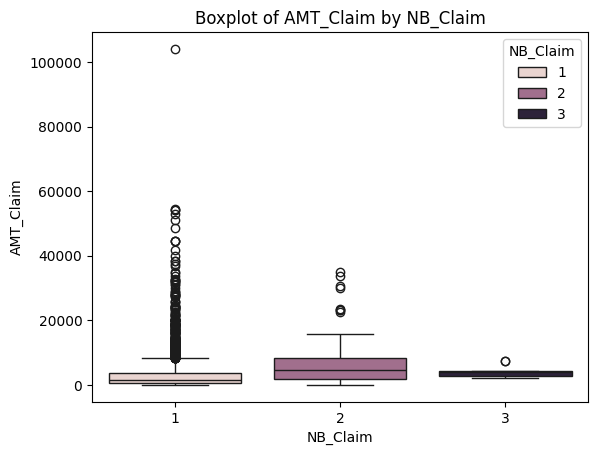

In [18]:
sns.boxplot(x='NB_Claim', y='AMT_Claim', data=sin_df, hue='NB_Claim')
plt.title('Boxplot of AMT_Claim by NB_Claim')
plt.show()

Visualizing the Boxplot of AMT_Claim by NB_Claim we notice the outliers on each category of NB_Claim.  
While the mean is around 3136 FOR AMT_Claim we observe values going from 10.000 to 104.000 for NB_Claim == 1.  

### 3.2 : DB_CNT

   - 3.2.a : Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values, Anomalies fix)

In [19]:
print("\nDB_CNT.xlsx DataFrame:")
print(cnt_df.info())



DB_CNT.xlsx DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100399 entries, 0 to 100398
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id_pol              100399 non-null  int64  
 1   Duration            100399 non-null  int64  
 2   Insured.age         100399 non-null  int64  
 3   Insured.sex         100399 non-null  object 
 4   Car.age             100399 non-null  int64  
 5   Marital             100307 non-null  object 
 6   Car.use             100399 non-null  object 
 7   Credit.score        100399 non-null  float64
 8   Region              100271 non-null  object 
 9   Annual.miles.drive  100399 non-null  float64
 10  Years.noclaims      100399 non-null  object 
 11  Territory           100399 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB
None


#### The DataSet is shaped as (100399, 12). 100399 rows and 12 columns.  
- Duration : Duration of the insurance coverage of a given policy, in days  
- Insured.age : Age of insured driver, in years  
- Insured.sex : Sex of insured driver (Male/Female)  
- Car.age : Age of vehicle, in years  
- Marital : Marital status (Single/Married)  
- Car.use : Use of vehicle: Private, Commute, Farmer, Commercial  
- Credit.score : Credit score of insured driver  
- Region  : Type of region where driver lives: rural, urban  
- Annual.miles.drive : Annual miles expected to be driven declared by driver  
- Years.noclaims : Number of years without any claims  
- Territory : Territorial location of vehicle  

Conditions to meet :   
• Duration is the period that policyholder is insured in days, with values in [22,366].  
• Insured.age is the age of insured driver in integral years, with values in [16,103].  
• Car.age is the age of vehicle, with values in [-2,20]. Negative values are rare but are possible as buying a newer model can be up to two years in advance.  
• Years.noclaims is the number of years without any claims, with values in [0, 79] and
always less than Insured.age.  
• Territory is the territorial location code of vehicle, which has 55 labels in {11,12,13,· · · ,91}.  

In [20]:
# Filter object variables
object_columns = cnt_df.select_dtypes(include='object').columns

# Display unique values for each object variable
for column in object_columns:
    unique_values = cnt_df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Insured.sex':
['Female' 'F' 'Male' 'H' 'Unknown']

Unique values in 'Marital':
['Single' 'Married' 'Celib' 'Marié' nan]

Unique values in 'Car.use':
['Private' 'Commute' 25 'Commercial' 'Farmer' ' ' 14 47 100 54 21 80 95 8
 10 74 94 26 17 34 29 96 78 11 1 6 19 69 85 52 42 88 72 99 24 84 15 71 53
 40 64 9 59 55 46 82 66 0 32 39 36 23 51 '  ' '??' 92 57 22 65 87 63 35 16
 62 50 90 70 3 12 5 68 75 4 18 76 2 89 83 7 73 77 27 91 61 20 '???' 33 93
 13 38 45 81 '?' 86 48 49 60 97 58 43 67 '     ' 44 37 '????' 41 28 'Inc'
 30 'Ukwn' 31]

Unique values in 'Region':
['Urban' 'Rural' nan]

Unique values in 'Years.noclaims':
[40 4 41 37 8 6 57 23 28 54 3 10 21 30 66 43 13 31 17 32 26 34 25 27 45 33
 24 11 51 39 22 15 46 19 20 5 44 42 36 29 59 62 55 58 12 1 9 50 47 2 48
 'EAJ' 35 18 49 7 56 14 38 52 63 67 16 53 65 0 61 64 60 68 69 72 70 74 73
 76 75 71 77 78 79 85 82 80]



##### Imputation of missing Values, and Miss-written Inputs.
We will proceed as following :

- Insured.Sex : We will match inputs as Male, Female  
- Marital : Single, Married  
- Car use : Private, Commute, Farmer, Commercial. We will use Territory values to commute to the right car use value.  
- Region : Urban, Rural. With help of terrority we will find the right Region for missing values.  
- Year.noclaims : EAJ > 0, Then we will turn the column to integer.  

In [21]:
# Count occurrences of unique values in 'Insured.sex'
sex_counts = cnt_df['Insured.sex'].value_counts()

# Display the result
print("Count of unique values in 'Insured.sex':")
print(sex_counts)
print()

# Count occurrences of unique values in 'Region'
Region_counts = cnt_df['Region'].value_counts()

# Display the result
print("Count of unique values in 'Region':")
print(Region_counts)
print()

# Count occurrences of unique values in 'Marital'
marital_counts = cnt_df['Marital'].value_counts()

# Display the result
print("Count of unique values in 'Marital':")
print(marital_counts)


Count of unique values in 'Insured.sex':
Insured.sex
Male       45932
Female     39065
H           8165
F           7124
Unknown      113
Name: count, dtype: int64

Count of unique values in 'Region':
Region
Urban    78358
Rural    21913
Name: count, dtype: int64

Count of unique values in 'Marital':
Marital
Married    65666
Single     28214
Marié       4467
Celib       1960
Name: count, dtype: int64


In [22]:
# Map values in 'Insured.sex'
sex_mapping = {'Male': ['Male', 'H', 'Unknown'], 'Female': ['Female', 'F']}

# Replace values in 'Insured.sex'
for category, values in sex_mapping.items():
    cnt_df['Insured.sex'] = cnt_df['Insured.sex'].replace(values, category)

# Verify the result
sex_counts_after_mapping = cnt_df['Insured.sex'].value_counts()
print("Count of unique values in 'Insured.sex' after mapping:")
print(sex_counts_after_mapping)

Count of unique values in 'Insured.sex' after mapping:
Insured.sex
Male      54210
Female    46189
Name: count, dtype: int64


In [23]:
# Map values in 'Marital'
marital_mapping = {'Single': ['Single', 'Celib'], 'Married': ['Married', 'Marié']}

# Replace values in 'Marital'
for category, values in marital_mapping.items():
    cnt_df['Marital'] = cnt_df['Marital'].replace(values, category)

# Add 'Unknown' and NaN to 'Single'
cnt_df['Marital'] = cnt_df['Marital'].fillna('Single')
cnt_df['Marital'] = cnt_df['Marital'].replace('Unknown', 'Single')

# Verify the result
marital_counts_after_mapping = cnt_df['Marital'].value_counts()
print("Count of unique values in 'Marital' after mapping:")
print(marital_counts_after_mapping)

Count of unique values in 'Marital' after mapping:
Marital
Married    70133
Single     30266
Name: count, dtype: int64


• Region  : Type of region where driver lives: rural, urban   
• Territory is the territorial location code of vehicle, which has 55 labels in {11,12,13,· · · ,91}.  
To fix the Region values, we will make clusters of Regions.
The idea here is to see the tuples as following :

Tuple = [Value(Region) : Territory(1,2,...)].  
Exemple : [Rural, Territory (1,5,9), Urban, Territory (7,89,63,...)].  
With this idea, we will then input the approx Region.  

In [24]:
# Select rows where 'Car.use' is in the specified categories
selected_car_use = ['Private', 'Commute', 'Farmer', 'Commercial']
filtered_df = cnt_df[cnt_df['Car.use'].isin(selected_car_use)]

# Group by 'Car.use' and count the occurrences of each 'Territory'
territory_by_car_use = filtered_df.groupby('Car.use')['Territory'].value_counts()

# Display the result
print(territory_by_car_use)

Car.use     Territory
Commercial  43           113
            35            98
            39            93
            31            84
            30            83
                        ... 
Private     90           492
            61           448
            62           436
            60           431
            11            31
Name: count, Length: 220, dtype: int64


In [25]:
# Display unique values and their counts in 'Years.noclaims'
unique_values_counts = cnt_df['Years.noclaims'].value_counts(dropna=False)

# Display the results
print("Unique values and their counts in 'Years.noclaims':")
print(unique_values_counts)

Unique values and their counts in 'Years.noclaims':
Years.noclaims
9     2436
8     2428
7     2254
10    2195
37    2111
      ... 
78       3
85       2
79       1
82       1
80       1
Name: count, Length: 84, dtype: int64


In [26]:
# Define the allowed car use categories
allowed_car_use = ['Private', 'Commute', 'Farmer', 'Commercial']

# Filter rows where 'Car.use' is not in the allowed categories
invalid_car_use_mask = ~cnt_df['Car.use'].isin(allowed_car_use)

# For invalid 'Car.use', correct based on 'Territory'
for index, row in cnt_df[invalid_car_use_mask].iterrows():
    territory = row['Territory']
    
    # Define mapping from Territory to corrected Car.use
    territory_to_car_use = {
        # Define your mappings here
        1: 'Private',
        2: 'Commute',
        3: 'Farmer',
        4: 'Commercial',
        # Add more mappings as needed
    }

    # Correct the 'Car.use' based on 'Territory'
    corrected_car_use = territory_to_car_use.get(territory, 'Commute')

    # Update the 'Car.use' in the DataFrame
    cnt_df.at[index, 'Car.use'] = corrected_car_use

# Verify the changes
print(cnt_df['Car.use'].value_counts())

Car.use
Commute       50235
Private       46103
Commercial     2650
Farmer         1411
Name: count, dtype: int64


In [27]:
# Define the allowed Region categories
allowed_Region = ['Rural', 'Urban']

# Filter rows where 'Region' is not in the allowed categories
invalid_Region_mask = ~cnt_df['Region'].isin(allowed_Region)

# For invalid 'Region', correct based on 'Territory'
for index, row in cnt_df[invalid_Region_mask].iterrows():
    territory = row['Territory']
    
    # Define mapping from Territory to corrected Region
    territory_to_Region = {
        # Define your mappings here
        1: 'Urban',
        2: 'Rural',
    }

    # Correct the 'Region' based on 'Territory'
    corrected_Region = territory_to_Region.get(territory, 'Urban')

    # Update the 'Region' in the DataFrame
    cnt_df.at[index, 'Region'] = corrected_Region

# Verify the changes
print(cnt_df['Region'].value_counts())

Region
Urban    78486
Rural    21913
Name: count, dtype: int64


In [28]:
# Count occurrences of 'EAJ' in 'Years.noclaims'
eaj_count = cnt_df['Years.noclaims'].eq('EAJ').sum()

# Display the result
print("Number of occurrences of 'EAJ':", eaj_count)

Number of occurrences of 'EAJ': 36


Years.noclaims must be in [0,79].  
Years.noclaims is the number of years without any claims, with values in [0, 79] and
always less than Insured.age.
We will add 'EAJ' to 1 and all the occurances from greater than 79 years will be added back to 79.

In [29]:
# Replace 'EAJ' with 1
cnt_df['Years.noclaims'] = cnt_df['Years.noclaims'].replace('EAJ', 1)

# Convert 'Years.noclaims' to numeric
cnt_df['Years.noclaims'] = pd.to_numeric(cnt_df['Years.noclaims'], errors='coerce')

# Replace values greater than 79 with 79
cnt_df['Years.noclaims'] = cnt_df['Years.noclaims'].where(cnt_df['Years.noclaims'] <= 79, 79)

# Verify the result
years_noclaims_summary = cnt_df['Years.noclaims'].describe()
print("Summary of 'Years.noclaims' after modifications:")
print(years_noclaims_summary)

Summary of 'Years.noclaims' after modifications:
count    100399.000000
mean         28.856493
std          16.153134
min           0.000000
25%          15.000000
50%          29.000000
75%          41.000000
max          79.000000
Name: Years.noclaims, dtype: float64


Years.noclaims must always be less than insured.age

In [30]:
# Check if 'Years.noclaims' is less than 'Insured.age'
invalid_years_noclaims_mask = cnt_df['Years.noclaims'] >= cnt_df['Insured.age']

# Calculate 'Years.noclaims - 16' for rows where the condition is not met
cnt_df.loc[~invalid_years_noclaims_mask, 'Years.noclaims'] = np.maximum(0, cnt_df['Years.noclaims'] - 16)


In [31]:
# Set values under 22 in 'Duration' to 22
cnt_df.loc[cnt_df['Duration'] < 22, 'Duration'] = 22


In [32]:
# Filter object variables
object_columns = cnt_df.select_dtypes(include='object').columns

# Display unique values for each object variable
for column in object_columns:
    unique_values = cnt_df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Insured.sex':
['Female' 'Male']

Unique values in 'Marital':
['Single' 'Married']

Unique values in 'Car.use':
['Private' 'Commute' 'Commercial' 'Farmer']

Unique values in 'Region':
['Urban' 'Rural']



Conditions Check :   
• Duration is the period that policyholder is insured in days, with values in [22,366].  
• Insured.age is the age of insured driver in integral years, with values in [16,103].  
• Car.age is the age of vehicle, with values in [-2,20]. Negative values are rare but are possible as buying a newer model can be up to two years in advance.  
• Years.noclaims is the number of years without any claims, with values in [0, 79] and
always less than Insured.age.  
• Territory is the territorial location code of vehicle, which has 55 labels in {11,12,13,· · · ,91}.  

In [33]:
# Find the range of values in 'Duration'
duration_range = (cnt_df['Duration'].min(), cnt_df['Duration'].max())
# Print the range
print("Range of values in 'Duration':", duration_range)


# Find the range of values in 'Insured.Age'
Insured_age_range = (cnt_df['Insured.age'].min(), cnt_df['Insured.age'].max())
# Print the range
print("Range of values in 'Insured.age':", Insured_age_range)


# Find the range of values in 'Car.age'
Car_age_range = (cnt_df['Car.age'].min(), cnt_df['Car.age'].max())
# Print the range
print("Range of values in 'Car.age':", Car_age_range)


# Find the range of values in 'Years.noclaims'
Years_noclaims_range = (cnt_df['Years.noclaims'].min(), cnt_df['Years.noclaims'].max())
# Print the range
print("Range of values in 'Years.noclaims':", Years_noclaims_range)


# Find the range of values in 'Territory'
Territory_range = (cnt_df['Territory'].min(), cnt_df['Territory'].max())
# Print the range
print("Range of values in 'Territory':", Territory_range)

Range of values in 'Duration': (22, 366)
Range of values in 'Insured.age': (16, 103)
Range of values in 'Car.age': (-2, 20)
Range of values in 'Years.noclaims': (0, 78)
Range of values in 'Territory': (11, 91)


For simplication purpose, we will turn 'Credit.score' and 'Annual.miles.drive' to integers

In [34]:
# Convert 'Credit.score' and 'Annual.miles.drive' to integers
cnt_df['Credit.score'] = cnt_df['Credit.score'].astype('int64')
cnt_df['Annual.miles.drive'] = cnt_df['Annual.miles.drive'].astype('int64')

In [35]:
print("\nDB_CNT.xlsx DataFrame:")
print(cnt_df.info())



DB_CNT.xlsx DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100399 entries, 0 to 100398
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id_pol              100399 non-null  int64 
 1   Duration            100399 non-null  int64 
 2   Insured.age         100399 non-null  int64 
 3   Insured.sex         100399 non-null  object
 4   Car.age             100399 non-null  int64 
 5   Marital             100399 non-null  object
 6   Car.use             100399 non-null  object
 7   Credit.score        100399 non-null  int64 
 8   Region              100399 non-null  object
 9   Annual.miles.drive  100399 non-null  int64 
 10  Years.noclaims      100399 non-null  int64 
 11  Territory           100399 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 9.2+ MB
None


#### 3.2.c Visualization

- Age and sex
- Sex and Car use
- Car Age and Credit Score
- Car Age and Car use and Region
- Annual miles and Region
- Annual miles and Car Use

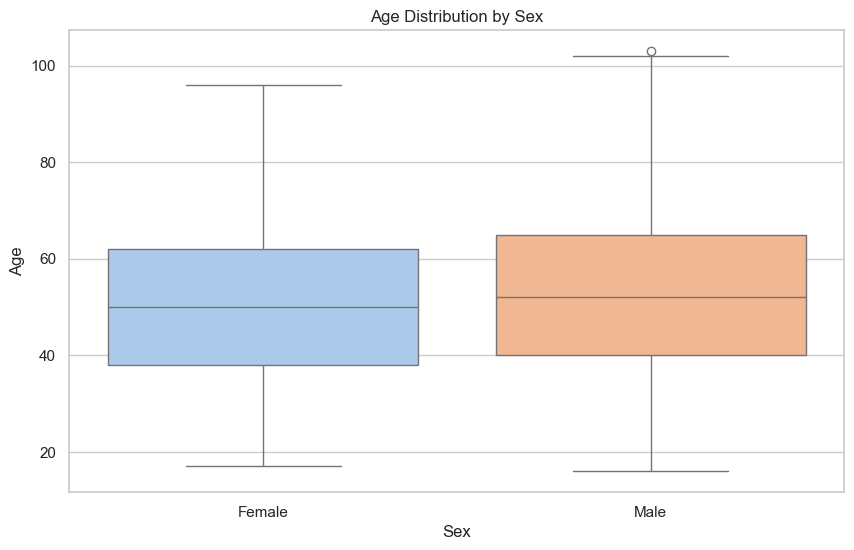

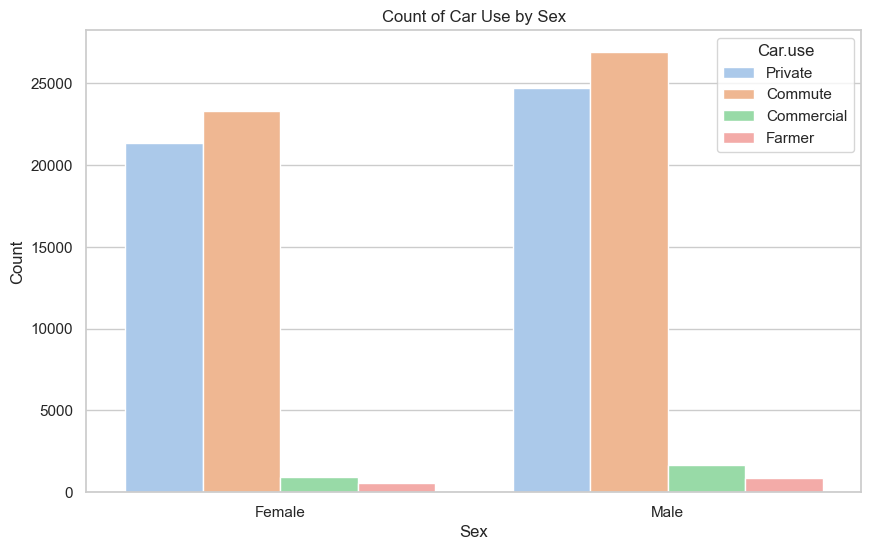

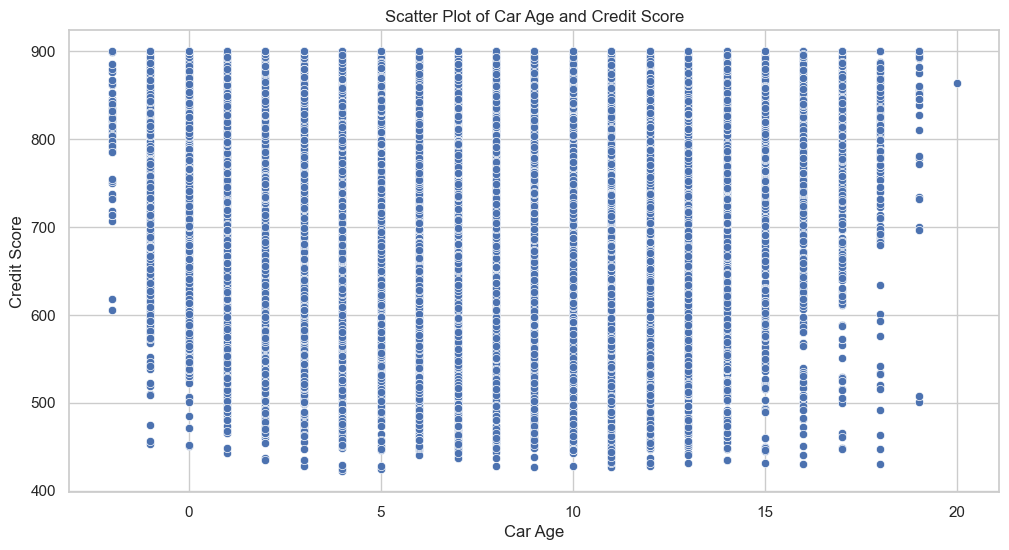

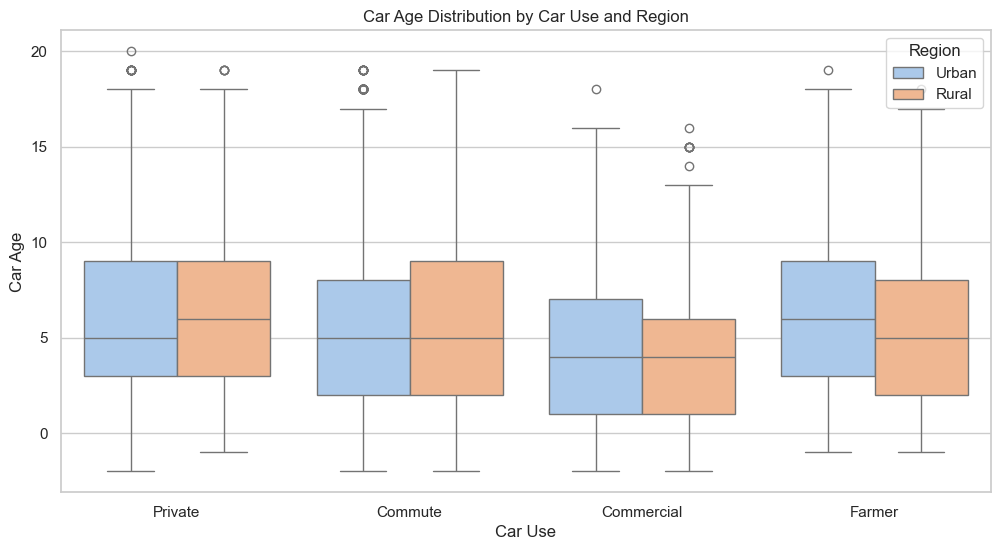

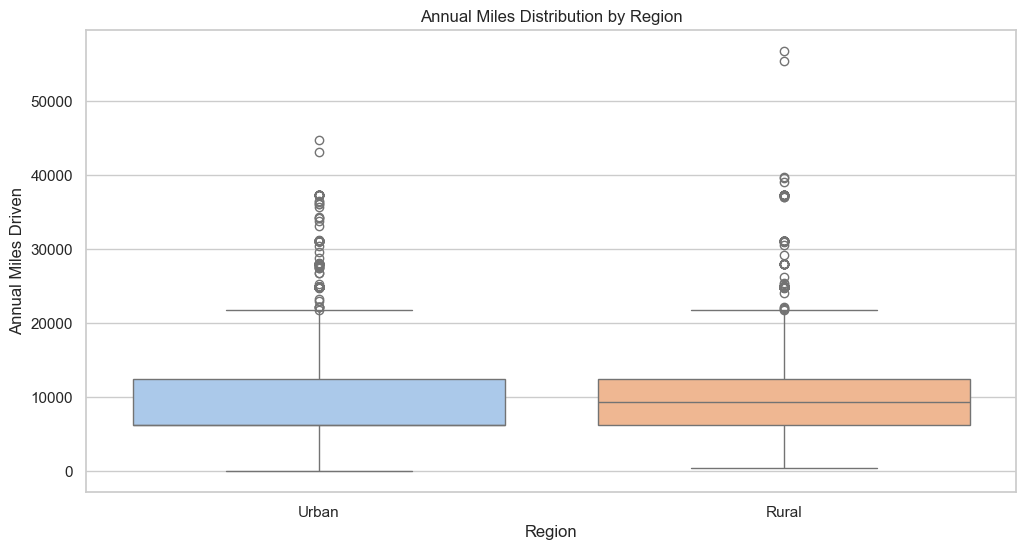

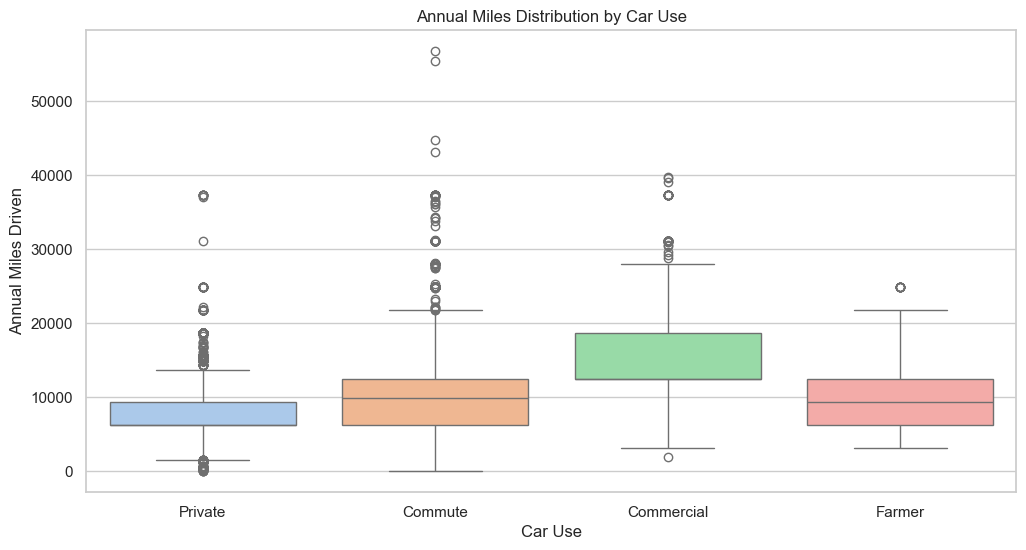

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Age and Sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='Insured.sex', y='Insured.age', data=cnt_df, palette='pastel')
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

# Sex and Car use
plt.figure(figsize=(10, 6))
sns.countplot(x='Insured.sex', hue='Car.use', data=cnt_df, palette='pastel')
plt.title('Count of Car Use by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Car Age and Credit Score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Car.age', y='Credit.score', data=cnt_df, palette='pastel')
plt.title('Scatter Plot of Car Age and Credit Score')
plt.xlabel('Car Age')
plt.ylabel('Credit Score')
plt.show()

# Car Age and Car use and Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Car.use', y='Car.age', hue='Region', data=cnt_df, palette='pastel')
plt.title('Car Age Distribution by Car Use and Region')
plt.xlabel('Car Use')
plt.ylabel('Car Age')
plt.legend(title='Region')
plt.show()

# Annual miles and Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Annual.miles.drive', data=cnt_df, palette='pastel')
plt.title('Annual Miles Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Annual Miles Driven')
plt.show()

# Annual miles and Car Use
plt.figure(figsize=(12, 6))
sns.boxplot(x='Car.use', y='Annual.miles.drive', data=cnt_df, palette='pastel')
plt.title('Annual Miles Distribution by Car Use')
plt.xlabel('Car Use')
plt.ylabel('Annual Miles Driven')
plt.show()


#### Commentaire : Conclusion 

### 3.3 DB_TELEMATICS
        

In [37]:
print("\nDB_Telematics.csv DataFrame:")
print(telematics_df.info())


DB_Telematics.csv DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100332 entries, 0 to 100331
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id_pol                  100332 non-null  object 
 1   Annual.pct.driven       100332 non-null  object 
 2   Total.miles.driven      100332 non-null  object 
 3   Pct.drive.mon           100332 non-null  object 
 4   Pct.drive.tue           100332 non-null  object 
 5   Pct.drive.wed           100332 non-null  object 
 6   Pct.drive.thr           100332 non-null  object 
 7   Pct.drive.fri           100332 non-null  object 
 8   Pct.drive.sat           100332 non-null  object 
 9   Pct.drive.sun           100332 non-null  object 
 10  Pct.drive.2hrs          100332 non-null  object 
 11  Pct.drive.3hrs          100332 non-null  object 
 12  Pct.drive.4hrs          100332 non-null  object 
 13  Pct.drive.wkday         100332 non-null  obj

* Annual.pct.driven Annualized percentage of time on the road  
* Total.miles.driven Total distance driven in miles  
* Pct.drive.xxx Percent of driving day xxx of the week: mon/tue/. . . /sun  
* Pct.drive.xhrs Percent vehicle driven within x hrs: 2hrs/3hrs/4hrs  
* Pct.drive.xxx Percent vehicle driven during xxx: wkday/wkend  
* Pct.drive.rushxx Percent of driving during xx rush hours: am/pm  
* Avgdays.week Mean number of days used per week  
* Accel.xxmiles Number of sudden acceleration 6/8/9/. . . /14 mph/s per 1000miles  
* Brake.xxmiles Number of sudden brakes 6/8/9/. . . /14 mph/s per 1000miles  
* Left.turn.intensityxx Number of left turn per 1000miles with intensity 08/09/10/11/12  
* Right.turn.intensityxx Number of right turn per 1000miles with intensity 08/09/10/11/12  

Conditions to meet for TELEMATICS.csv :  
• Annual.pct.driven is the number of day a policyholder uses vehicle divided by 365, with
values in [0,1.1].  
• Pct.drive.mon, · · · , Pct.drive.sun are compositional variables meaning that the sum
of seven (days of the week) variables is 100%.  
• Pct.drive.wkday and Pct.drive.wkend are clearly compositional variables too.  

#### 3.3.a Data Check and Cleaning (Missing Values, Duplicates, Data Types, Unique values)

We see that the variable Id_pol is in a different form and some of the columns are objects when they should be floats. Lets start there.

In [38]:
# Remove 'cnt_' prefix from 'Id_pol'
telematics_df['Id_pol'] = telematics_df['Id_pol'].str.replace('cnt_', '')

# Display the updated 'Id_pol' column
print(telematics_df['Id_pol'])


0         122389
1         125019
2         181154
3         140021
4         170356
           ...  
100327    215461
100328    206415
100329    187472
100330    193966
100331    129620
Name: Id_pol, Length: 100332, dtype: object


In [39]:
columns_to_convert = [
    'Id_pol', 'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue',
    'Pct.drive.wed', 'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
    'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday', 'Pct.drive.wkend',
    'Pct.drive.rush am', 'Pct.drive.rush pm', 'Avgdays.week'
]

In [40]:


telematics_df[columns_to_convert] = telematics_df[columns_to_convert].replace(',', '.', regex=True)

In [ ]:
# View the specified columns before conversion
#print(telematics_df[columns_to_convert])

In [42]:
telematics_df[columns_to_convert] = telematics_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [43]:
missing_values = telematics_df.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])


Missing Values per Column:
Series([], dtype: int64)


There is no missing Values in the DataSet. 

Urban > Acceleration > Brake

Drive.Hour(Rural/urban)

Correlation : 
- (Acceleration) > Claims
- Accelaration > Age/Sex > Rural
- diff Annual Miles Telematics vs Annual Miles CNT/

AvgDayWeek
Drive.rush


In [45]:
print("\nDB_Telematics.csv DataFrame:")
print(telematics_df.info())


DB_Telematics.csv DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100332 entries, 0 to 100331
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id_pol                  100332 non-null  int64  
 1   Annual.pct.driven       100332 non-null  float64
 2   Total.miles.driven      100332 non-null  float64
 3   Pct.drive.mon           100332 non-null  float64
 4   Pct.drive.tue           100332 non-null  float64
 5   Pct.drive.wed           100332 non-null  float64
 6   Pct.drive.thr           100332 non-null  float64
 7   Pct.drive.fri           100332 non-null  float64
 8   Pct.drive.sat           100332 non-null  float64
 9   Pct.drive.sun           100332 non-null  float64
 10  Pct.drive.2hrs          100332 non-null  float64
 11  Pct.drive.3hrs          100332 non-null  float64
 12  Pct.drive.4hrs          100332 non-null  float64
 13  Pct.drive.wkday         100332 non-null  flo

#### 3.3.b Preprocessing and Exploratory Analysis
     

#### 3.3.c Visualization

In [ ]:
# Convert 'Id_pol' in DB_Telematics.csv to int64
telematics_df['Id_pol'] = pd.to_numeric(telematics_df['Id_pol'].str.replace('cnt_', ''), errors='coerce', downcast='integer').astype('int64')


In [46]:
# List of object-type columns to convert to float64
object_columns_to_convert = [
    'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue',
    'Pct.drive.wed', 'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat',
    'Pct.drive.sun', 'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs',
    'Pct.drive.wkday', 'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
    'Avgdays.week'
]

# Replace commas with dots and convert to float64
telematics_df[object_columns_to_convert] = telematics_df[object_columns_to_convert].replace(',', '.', regex=True).astype('float64')

# Display the updated DataFrame
print(telematics_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100332 entries, 0 to 100331
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id_pol                  100332 non-null  int64  
 1   Annual.pct.driven       100332 non-null  float64
 2   Total.miles.driven      100332 non-null  float64
 3   Pct.drive.mon           100332 non-null  float64
 4   Pct.drive.tue           100332 non-null  float64
 5   Pct.drive.wed           100332 non-null  float64
 6   Pct.drive.thr           100332 non-null  float64
 7   Pct.drive.fri           100332 non-null  float64
 8   Pct.drive.sat           100332 non-null  float64
 9   Pct.drive.sun           100332 non-null  float64
 10  Pct.drive.2hrs          100332 non-null  float64
 11  Pct.drive.3hrs          100332 non-null  float64
 12  Pct.drive.4hrs          100332 non-null  float64
 13  Pct.drive.wkday         100332 non-null  float64
 14  Pct.drive.wkend     

## 4. Merging DataBases

We will merge the bases to be able to work on a larger scale of variables.

## 4. DataBase Merges 

### 4.1. Descriptive Data Analysis : Univaried/Multivaried

### 4.2. Analyse graphique (data visualisation) + Interfaçage via Shiny for Python 

## 5. Modélisation

### 5.1 supervisée (régression, classification) vs non supervisée    

### 5.2 paramétrique (économétriques) vs non paramétriques (machine learning)

## 6. Analyse des résultats : interprétation, explications 

### 6.1 Interpretation des résultats

## 7. Application : prévision, tarification, etc.

### 7.1 Prevision and Tarification